___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

First, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix, average_precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Enviroment setting
plt.rcParams["figure.figsize"] = (10,10)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
female = pd.read_csv("/Users/lavondaharrison/Desktop/Clarusway/Machine Learning Module/Machine Learning ML -12:22/ML Project Notebooks and Solutions/ML - Project-2 Soldiers Race Classification (ML 12:22 US)/ANSUR II FEMALE Public.csv", encoding="utf-8")

In [3]:
male = pd.read_csv("/Users/lavondaharrison/Desktop/Clarusway/Machine Learning Module/Machine Learning ML -12:22/ML Project Notebooks and Solutions/ML - Project-2 Soldiers Race Classification (ML 12:22 US)/ANSUR II MALE Public.csv", encoding="latin-1")

## Explore Data

In [4]:
female.head(5)

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [5]:
female.shape

(1986, 108)

In [6]:
male.head(5)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [7]:
male.shape

(4082, 108)

In [8]:
female.columns

Index(['SubjectId', 'abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace', 'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs', 'WritingPreference'], dtype='object', length=108)

In [9]:
male.columns

Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace', 'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs', 'WritingPreference'], dtype='object', length=108)

In [10]:
# column subjectID needs to match the name in male dataset
female.rename(columns={'SubjectId':'subjectid'},inplace=True)

In [11]:
female.columns

Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace', 'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs', 'WritingPreference'], dtype='object', length=108)

In [12]:
#female.isnull().sum()
female.isnull().sum().any()

True

In [13]:
#female.isnull().sum()
male.isnull().sum().any()

True

In [14]:
data = pd.concat([male,female], axis=0, ignore_index=True)
data.head(10)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [15]:
data.tail(5)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
6063,29501,285,1392,335,223,1297,252,196,368,299,312,477,72,306,282,136,1089,255,856,652,541,373,1457,290,1082,293,1258,779,732,382,36,60,19,210,746,103,259,328,262,514,456,1085,81,197,193,151,582,205,321,75,381,413,1048,615,373,390,462,535,486,61,423,121,369,391,1307,118,414,237,1036,354,145,865,840,555,1716,1687,1391,1119,660,155,749,446,136,872,1706,447,334,1043,265,370,1002,832,162,836,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,3,Mexican,3,51,67,180,Right hand
6064,29502,262,1324,301,202,1204,236,181,378,294,287,468,66,309,311,145,1016,246,818,572,464,375,1390,291,1016,269,1151,732,647,331,36,65,23,274,770,101,245,319,261,514,440,985,81,196,183,160,570,186,296,61,347,377,974,650,400,411,433,483,457,58,383,130,359,399,1323,99,377,237,1051,318,142,881,794,525,1620,1613,1316,1043,616,157,721,422,131,838,1648,446,334,971,243,374,958,717,157,804,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,25U,Texas,3,Mexican,3,40,63,150,Right hand
6065,29503,260,1334,318,213,1259,234,183,363,332,299,460,70,317,311,139,1063,262,846,637,525,370,1412,285,1093,286,1166,793,609,326,39,62,18,204,739,97,249,338,288,530,459,1050,82,192,191,144,559,190,318,72,364,400,986,640,400,412,450,517,476,57,412,111,352,402,1318,116,392,259,1054,338,136,841,848,566,1740,1644,1337,1054,640,159,758,449,127,862,1590,444,335,982,254,351,970,762,159,774,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,2,NaN,2,40,66,168,Right hand
6066,29511,205,1293,302,199,1207,213,163,376,276,280,426,62,282,267,137,1051,225,786,582,480,370,1377,270,922,243,1137,763,575,310,35,62,21,222,738,91,226,306,258,430,425,995,74,177,176,149,558,186,280,59,369,411,971,640,383,418,432,491,445,58,400,119,326,380,1286,111,375,230,996,321,136,854,791,530,1628,1616,1288,1028,623,163,725,419,135,802,1525,450,298,837,208,335,952,632,146,769,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,92Y,Texas,3,Mexican,3,31,63,133,Right hand
6067,920103,238,1346,308,210,1256,236,188,361,285,279,433,71,304,278,129,974,217,820,586,479,343,1401,272,902,219,1186,783,536,307,35,58,23,243,754,100,239,314,259,464,439,1053,78,187,177,148,561,189,310,78,33

In [16]:
data.shape

(6068, 108)

In [17]:
data.info(verbose=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [18]:
data.duplicated().sum()

0

In [19]:
# check for missing data
# drop columns that have at least 30% of values are null
# create an object to idenitfy missiing sum and use len to determine variable with a null sum of < 0.3 (30%)

null_sum = data.isnull().sum()
data.columns[null_sum < len(data) * 0.3]  # columns will keep

Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed',
       ...
       'Component', 'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace', 'DODRace', 'Age', 'Heightin', 'Weightlbs', 'WritingPreference'], dtype='object', length=107)

In [20]:
null_sum

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [21]:
data.drop(columns=data.columns[null_sum > len(data) * 0.3], inplace=True)

In [22]:
data.shape

(6068, 107)

In [23]:
data.describe()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
count,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000,6068.000
mean,20757.198,246.469,1406.161,327.374,224.891,1299.609,244.193,194.755,399.204,340.934,274.735,490.754,72.253,324.897,306.636,139.723,1020.085,241.620,870.152,608.999,497.098,386.041,1477.490,282.859,1022.099,251.738,1252.013,825.110,621.852,351.316,35.132,62.626,22.263,240.911,785.914,98.865,263.034,338.767,295.011,552.076,467.007,1102.049,84.953,203.861,189.287,152.183,570.035,196.335,332.623,70.757,348.385,385.733,1040.059,632.602,412.038,432.341,475.513,540.125,483.240,69.580,406.480,119.519,375.441,413.835,1388.404,113.917,416.187,259.192,1129.362,354.084,145.073,898.108,866.665,576.900,1763.795,1714.406,1402.949,1099.587,622.199,176.336,789.696,458.245,129.618,882.740,1630.309,460.525,317.750,914.501,229.674,377.004,1031.501,797.094,169.003,830.060,17.515,1.615,29.761,68.257,174.750
std,13159.391,37.400,79.091,20.720,16.052,72.022,16.845,13.516,30.237,41.520,19.221,42.136,5.345,17.088,20.794,7.308,76.423,26.483,54.823,33.793,29.082,30.647,84.324,20.659,100.672,26.778,79.584,54.748,45.333,29.945,3.231,4.876,3.173,28.509,41.866,6.658,17.391,23.245,30.050,62.368,30.035,68.546,6.347,15.551,11.506,6.236,18.291,8.485,22.461,5.933,25.298,32.400,59.867,36.509,43.066,38.658,33.075,34.203,29.360,7.270,33.228,7.880,39.770,38.156,85.849,7.137,31.266,19.778,92.829,22.599,12.424,45.299,57.524,38.259,110.833,90.015,78.768,60.541,57.751,16.220,53.824,29.759,6.660,54.403,98.624

In [24]:
# Feature Subject

In [25]:
data.describe(include = "object").T

,count,unique,top,freq
Gender,6068,2,Male,4082
Date,6068,253,27-Feb-12,45
Installation,6068,12,Camp Shelby,1160
Component,6068,3,Regular Army,3140
Branch,6068,3,Combat Service Support,3174
PrimaryMOS,6068,285,11B,671
SubjectsBirthLocation,6068,152,California,446
WritingPreference,6068,3,Right hand,5350


In [26]:
object_col = data.select_dtypes(include='object').columns
object_col

Index(['Gender', 'Date', 'Installation', 'Component', 'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [27]:
for col in object_col:
    print(col)
    print("--"*8)
    print(data[col].value_counts(dropna=False))
    print("--"*20)

Gender
----------------
Male      4082
Female    1986
Name: Gender, dtype: int64
----------------------------------------
Date
----------------
27-Feb-12    45
5-Apr-12     44
21-Feb-12    43
28-Feb-12    43
5-Mar-12     43
6-Mar-12     41
2-Jun-11     41
26-May-11    40
3-Apr-12     40
26-Mar-12    40
23-Feb-12    39
13-Mar-12    39
29-Feb-12    39
15-Mar-11    39
27-Apr-11    39
30-Mar-11    39
1-Mar-12     38
8-Dec-10     38
20-Mar-12    37
28-May-11    37
24-Jan-12    36
21-Mar-12    36
7-Mar-12     36
11-Apr-11    36
2-Mar-12     36
21-Mar-11    36
25-Jan-12    35
18-Mar-11    35
16-Mar-12    34
24-Feb-12    34
28-Jan-12    33
27-May-11    33
25-Mar-11    33
30-Jan-11    33
15-Aug-11    33
25-Mar-12    33
8-Jun-11     33
26-Mar-11    32
16-Aug-11    32
8-Mar-12     32
7-Jun-11     32
19-Mar-12    32
27-Jan-12    31
8-Dec-11     31
19-Jan-12    31
31-Mar-11    31
7-Nov-11     31
17-Mar-11    31
20-Jan-11    31
12-Dec-11    31
5-Oct-11     30
31-Jan-12    30
3-Jun-11     30
2-Feb-12

In [28]:
data.DODRace.unique()

array([1, 2, 3, 4, 5, 6, 8])

In [29]:
# label category variables

data["DODRace"] = data.DODRace.map({
    1: "White",
    2: "Black",
    3: "Hispanic",
    4: "Asian",
    5: "Native American",
    6: "Pacific Islander",
    8: "Other"
})

In [30]:
data.DODRace.value_counts(dropna=False)

White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Other                  3
Name: DODRace, dtype: int64

In [31]:
print(data.DODRace)

0          White
1          White
2          Black
3          White
4          Black
          ...   
6063    Hispanic
6064    Hispanic
6065       Black
6066    Hispanic
6067    Hispanic
Name: DODRace, Length: 6068, dtype: object


In [32]:
data.DODRace.unique()

array(['White', 'Black', 'Hispanic', 'Asian', 'Native American',
       'Pacific Islander', 'Other'], dtype=object)

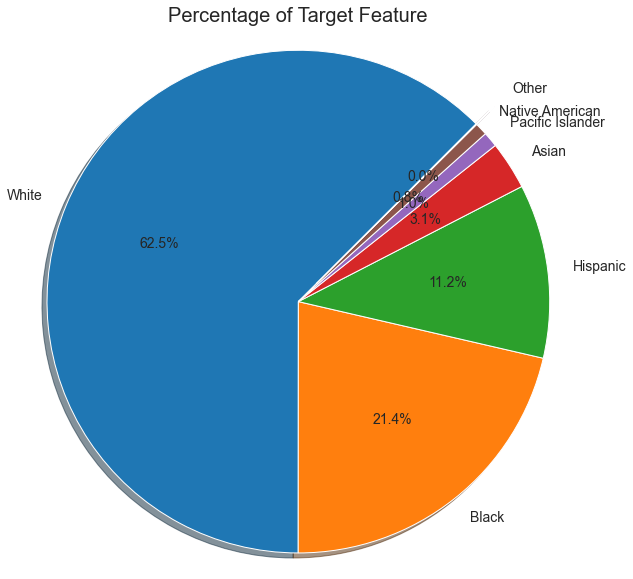

In [33]:
# pie chart for race categories
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize=(10, 10))

ax.pie(x=data.DODRace.value_counts().values, 
       labels=['White', 'Black', "Hispanic", "Asian", "Pacific Islander", "Native American", "Other"], 
       autopct='%.1f%%',
       explode=(0, 0, 0, 0, 0, 0.0, 0.1),
       textprops={'fontsize': 14},
       shadow=True,
       startangle=45
       )

ax.axis('equal')

plt.title("Percentage of Target Feature", fontdict={'fontsize': 20})
plt.show()

In [34]:
data.groupby(["Component", "Branch"])["DODRace"] .value_counts(normalize=True)

Component            Branch                  DODRace         
Army National Guard  Combat Arms             White              0.772
                                             Black              0.098
                                             Hispanic           0.092
                                             Asian              0.022
                                             Native American    0.011
                                             Pacific Islander   0.005
                     Combat Service Support  White              0.644
                                             Black              0.219
                                             Hispanic           0.100
                                             Asian              0.023
                                             Pacific Islander   0.008
                                             Native American    0.007
                     Combat Support          White              0.662
                            

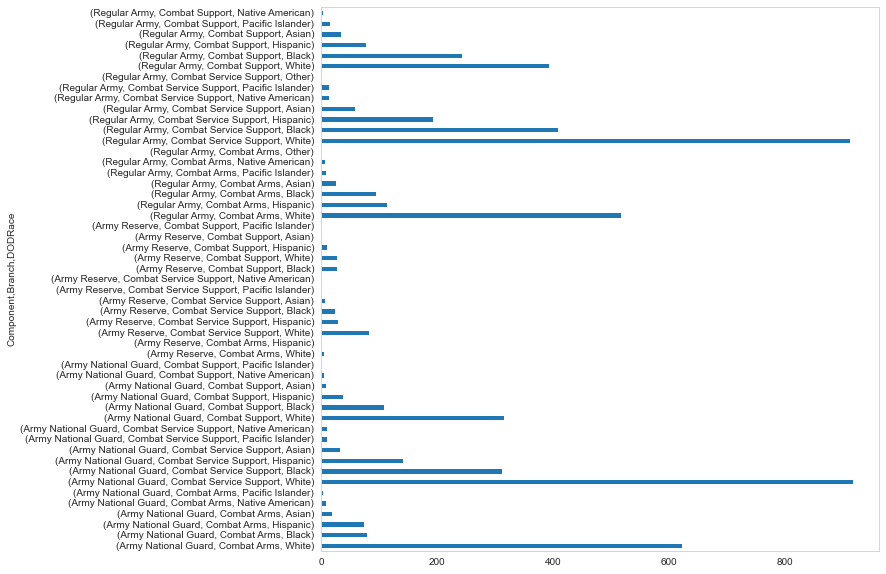

In [35]:
data.groupby(["Component", "Branch"])["DODRace"].value_counts().plot(kind="barh",figsize=(10,10));

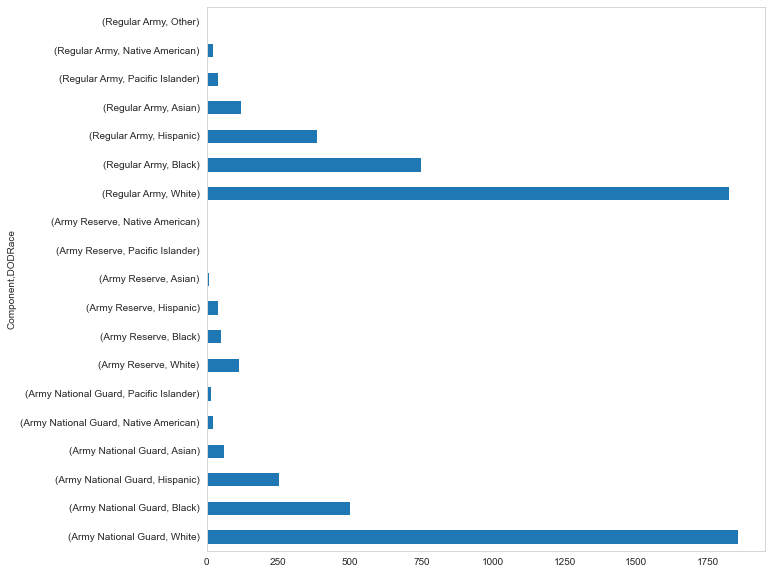

In [36]:
data.groupby(["Component"])["DODRace"].value_counts().plot(kind="barh");

In [37]:
print(data.columns.to_list())

['subjectid', 'abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc', 'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting', 'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength', 'handbreadth', 'handcircumference', 'handlength', 'headbreadth', 'headcircumference', 'headlength', 'heel

In [38]:
# drop columns repeated and unnecessary column
dropped = ['subjectid' , "Date", "Installation", "Component", "Branch", "PrimaryMOS",
    "Weightlbs", "Heightin","SubjectNumericRace"
]

data.drop(dropped, axis=1, inplace=True)

In [39]:
data = data[(data["DODRace"] == "White") | (data["DODRace"] == "Black") |
                (data["DODRace"] == "Hispanic")]
data

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,North Dakota,White,41,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,New York,White,35,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,New York,Black,42,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,Wisconsin,White,31,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,North Carolina,Black,21,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

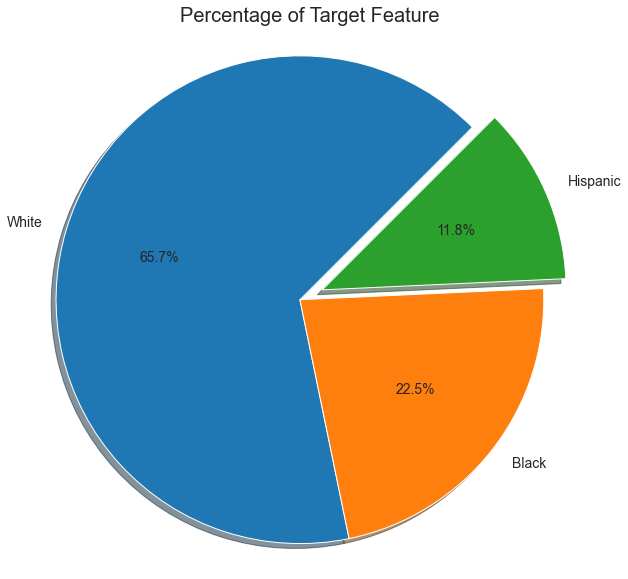

In [40]:
# pie chart for remaining race categories
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(figsize=(10, 10))

ax.pie(x=data.DODRace.value_counts().values, 
       labels=['White', 'Black', "Hispanic"], 
       autopct='%.1f%%',
       explode=(0, 0, 0.1),
       textprops={'fontsize': 14},
       shadow=True,
       startangle=45
       )

ax.axis('equal')

plt.title("Percentage of Target Feature", fontdict={'fontsize': 20})
plt.show()

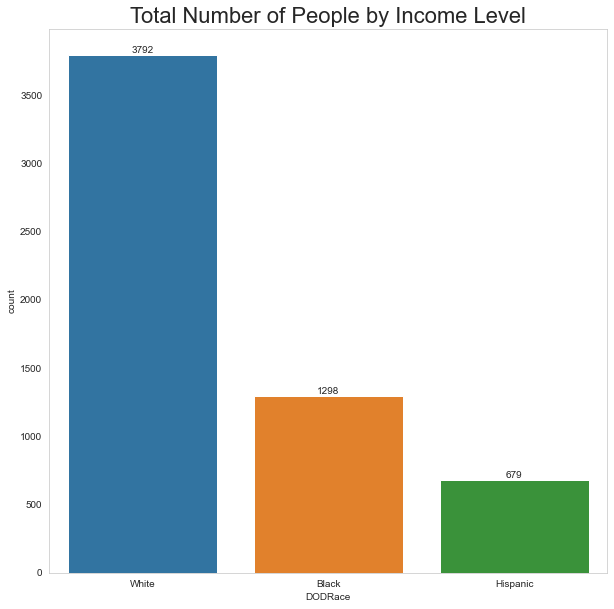

In [41]:
fig, ax = plt.subplots()

ax = sns.countplot(data=data, x="DODRace")

ax.set_title("Total Number of People by Income Level", fontsize=22)

for container in ax.containers:
    ax.bar_label(container);

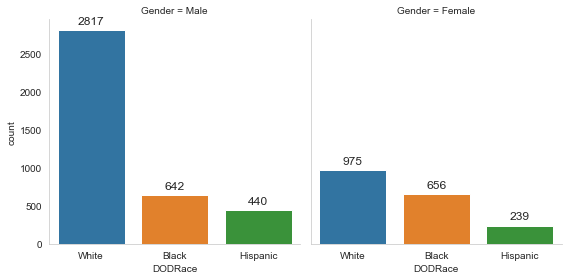

In [42]:
p = sns.catplot(
    data=data, x="DODRace", col="Gender",
    kind="count", height=4, aspect=1, hue = None
);
for f in p.axes.flatten():
    for c in f.containers:
        f.bar_label(c, padding=4, fontsize=12);

In [43]:
data.reset_index(drop=True, inplace=True)

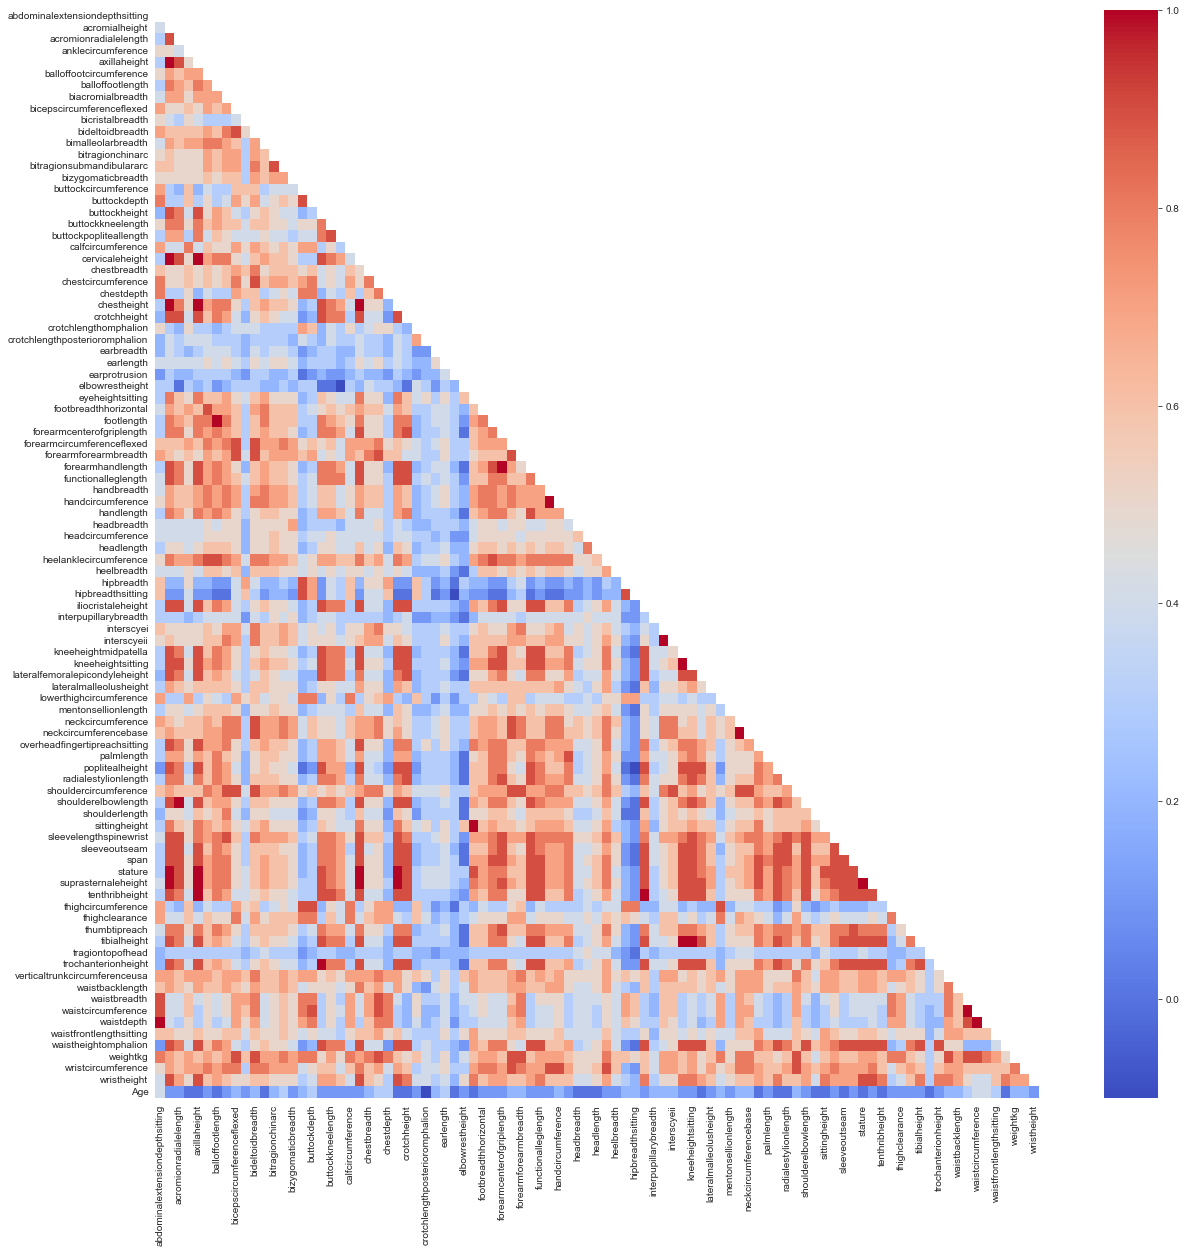

In [44]:
# for all variables

plt.figure(figsize=(20, 20))

# sns.heatmap(df.corr(), annot=True, cmap="coolwarm");

# # BONUS If you want to show half of the Meatmap Matrix
# # Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(data.corr())

# # using the upper triangle matrix as mask 
sns.heatmap(data.corr().round(1),  cmap="coolwarm", mask=matrix);

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [45]:
data.shape

(5769, 98)

In [46]:
X = data.drop("DODRace",axis=1)
y = data.DODRace

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)

In [48]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 97)
Train target shape   :  (4615,)
Test features shape  :  (1154, 97)
Test target shape    :  (1154,)


In [49]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

cat = X_train.select_dtypes("object").columns
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [50]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

operations=[('OneHotEncoder',column_trans),('logistic',LogisticRegression(class_weight='balanced',max_iter=10000,random_state=42))]

pipe_model=Pipeline(steps=operations)

In [51]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('logistic',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=42))])

In [52]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


def eval_metric(model, X_train, y_train, X_test, y_test, model_name = ' ' , average= None , labels = " " ):
    y_pred_train = pipe_model.predict(X_train)
    y_pred_test = pipe_model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred_test))
    print(classification_report(y_test, y_pred_test))
    print("--"*40)
    print("Train_Set")
    print(confusion_matrix(y_train, y_pred_train))
    print(classification_report(y_train, y_pred_train))
    
    return pd.DataFrame.from_dict({
        'accuracy_test' :accuracy_score(y_test, y_pred_test),
        'f1_test'       :f1_score(y_test, y_pred_test, average=average, labels=labels)[0],
        'recall_test'   :recall_score(y_test, y_pred_test, average=average, labels=labels)[0],
        'precision_test':precision_score(y_test, y_pred_test, average=average, labels=labels)[0],        
        'accuracy_train' :accuracy_score(y_train, y_pred_train),
        'f1_train'       :f1_score(y_train, y_pred_train, average=average, labels=labels) [0],        
        'recall_train'   :recall_score(y_train, y_pred_train, average=average, labels=labels) [0],
        'precision_train':precision_score(y_train, y_pred_train, average=average, labels=labels) [0],
    }, orient='index', columns=[model_name]).T

In [53]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test, 'Logistic Regression', average=None, labels = ["Hispanic"])

Test_Set
[[237  14   9]
 [  6 107  23]
 [ 12  93 653]]
              precision    recall  f1-score   support

       Black       0.93      0.91      0.92       260
    Hispanic       0.50      0.79      0.61       136
       White       0.95      0.86      0.91       758

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154

--------------------------------------------------------------------------------
Train_Set
[[ 973   34   31]
 [  21  454   68]
 [  64  357 2613]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.88      0.88      4615



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
Logistic Regression,0.864,0.611,0.787,0.500,0.875,0.654,0.836,0.537


In [54]:
scoring = {
    "f1_Hispanic" : make_scorer(f1_score, average = None, labels=["Hispanic"]),
    "recall_Hispanic" : make_scorer(recall_score, average = None, labels=["Hispanic"]),
    "precision_Hispanic" : make_scorer(precision_score, average = None, labels=["Hispanic"])}

In [55]:
from sklearn.model_selection import cross_validate, cross_val_score

operations=[('OneHotEncoder',column_trans),('logistic',LogisticRegression(class_weight='balanced',max_iter=10000,random_state=42))]

model = Pipeline(steps = operations)
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv=10, error_score="raise")
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_f1_Hispanic          0.610
test_recall_Hispanic      0.779
test_precision_Hispanic   0.502
dtype: float64

### Logistic Model GridsearchCV
### selecting the best parameters

In [56]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

In [57]:
param_grid = {
    "log__C":(4, 5, 3),
    'log__penalty': ["l1", "l2"],
    'log__solver': ['liblinear', 'lbfgs']
}

In [58]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000, random_state=42))]

model = Pipeline(steps=operations)

grid_model = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1, cv=10,return_train_score=True)

In [59]:
grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 6/10] END log__C=4, log__penalty=l1, log__solver=liblinear;, score=(train=0.716, test=0.667) total time=   5.7s
[CV 1/10] END log__C=4, log__penalty=l1, log__solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/10] END log__C=4, log__penalty=l1, log__solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/10] END log__C=4, log__penalty=l1, log__solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/10] END log__C=4, log__penalty=l1, log__solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/10] END log__C=4, log__penalty=l1, log__solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 6/10] END log__C=4, log__penalty=l1, log__solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 7/10] END log__C=4, log__penalty=l1, log__solver=lbfgs;, score=(train=nan, test=nan) total time=   0.0s
[CV 8/10] END log__C=4, log__penalty=l1, log__solver=lbfgs;, scor

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'log__C': (4, 5, 3), 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [60]:
grid_model.best_params_ # default accuracy score

{'log__C': 3, 'log__penalty': 'l2', 'log__solver': 'lbfgs'}

In [61]:
grid_model.best_score_

0.7662626262626262

In [62]:
grid_model.best_index_

11

In [63]:
pd.DataFrame(grid_model.cv_results_).loc[11, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.766
mean_train_score   0.850
Name: 11, dtype: object

In [64]:
eval_metric(grid_model, X_train, y_train, X_test, y_test, 'Logistic Regression', average=None, labels=["Hispanic"])

Test_Set
[[237  14   9]
 [  6 107  23]
 [ 12  93 653]]
              precision    recall  f1-score   support

       Black       0.93      0.91      0.92       260
    Hispanic       0.50      0.79      0.61       136
       White       0.95      0.86      0.91       758

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154

--------------------------------------------------------------------------------
Train_Set
[[ 973   34   31]
 [  21  454   68]
 [  64  357 2613]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.88      0.88      4615



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
Logistic Regression,0.864,0.611,0.787,0.500,0.875,0.654,0.836,0.537


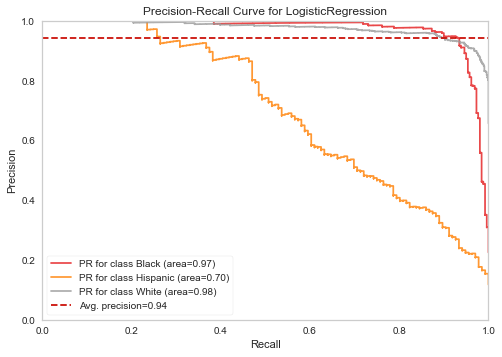

In [65]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000, random_state=42))]

model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],   
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [66]:
viz.score_

{'Black': 0.9724158333711983,
 'Hispanic': 0.7035830190532725,
 'White': 0.9759471000954564,
 'micro': 0.9423155159585564}

In [67]:
y_pred = grid_model.predict(X_test)

log_AP = viz.score_["Hispanic"]
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 2. SVC

### Vanilla SVC model 

In [68]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import Pipeline

operations_svc = [("OneHotEncoder", column_trans), ("SVC", SVC(class_weight="balanced",random_state=42))]

pipe_svc = Pipeline(steps=operations_svc)

In [69]:
pipe_svc.fit(X_train , y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('SVC', SVC(class_weight='balanced', random_state=42))])

In [70]:
eval_metric(pipe_svc, X_train, y_train, X_test, y_test, 'SVC', average=None, labels=["Hispanic"])

Test_Set
[[237  14   9]
 [  6 107  23]
 [ 12  93 653]]
              precision    recall  f1-score   support

       Black       0.93      0.91      0.92       260
    Hispanic       0.50      0.79      0.61       136
       White       0.95      0.86      0.91       758

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154

--------------------------------------------------------------------------------
Train_Set
[[ 973   34   31]
 [  21  454   68]
 [  64  357 2613]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.88      0.88      4615



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
SVC,0.864,0.611,0.787,0.500,0.875,0.654,0.836,0.537


In [71]:
from sklearn.model_selection import cross_validate, cross_val_score

operations_svc = [("OneHotEncoder", column_trans), ('SVC', SVC(class_weight="balanced",random_state=42))]

model = Pipeline(steps=operations)
  
scoring = {
    "f1_Hispanic" : make_scorer(f1_score, average = None, labels=["Hispanic"]),
    "recall_Hispanic" : make_scorer(recall_score, average = None, labels=["Hispanic"]),
    "precision_Hispanic" : make_scorer(precision_score, average = None, labels=["Hispanic"])} 

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv=5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]


test_f1_Hispanic          0.606
test_recall_Hispanic      0.771
test_precision_Hispanic   0.499
dtype: float64

###  SVC Model GridsearchCV

In [72]:
param_grid = {
    'svc__C': [1,2,3],
    'svc__gamma': ["scale", 'auto', 1, 0.1, 0.01], 
    'svc__class_weight': ['balanced'], 
}

In [73]:
from sklearn.model_selection import GridSearchCV

operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(class_weight='balanced', random_state=42))]

model = Pipeline(steps=operations_svc)

SVC_grid_model = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1, cv=5)
                             

In [74]:
SVC_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 2/5] END svc__C=1, svc__class_weight=balanced, svc__gamma=scale;, score=0.685 total time=   2.6s
[CV 4/5] END svc__C=1, svc__class_weight=balanced, svc__gamma=scale;, score=0.798 total time=   2.7s
[CV 3/5] END svc__C=1, svc__class_weight=balanced, svc__gamma=scale;, score=0.807 total time=   2.7s
[CV 1/5] END svc__C=1, svc__class_weight=balanced, svc__gamma=scale;, score=0.806 total time=   2.8s
[CV 5/5] END svc__C=1, svc__class_weight=balanced, svc__gamma=scale;, score=0.761 total time=   2.9s
[CV 2/5] END svc__C=1, svc__class_weight=balanced, svc__gamma=auto;, score=0.630 total time=   4.1s
[CV 4/5] END svc__C=1, svc__class_weight=balanced, svc__gamma=auto;, score=0.716 total time=   4.3s
[CV 3/5] END svc__C=1, svc__class_weight=balanced, svc__gamma=auto;, score=0.706 total time=   4.5s
[CV 5/5] END svc__C=1, svc__class_weight=balanced, svc__gamma=auto;, score=0.670 total time=   4.5s
[CV 1/5] END svc__C=1, svc__class_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 2, 3], 'svc__class_weight': ['balanced'],
                         'svc__gamma': ['scale', 'auto', 1, 0.1, 0.01]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [75]:
SVC_grid_model.best_params_

{'svc__C': 3, 'svc__class_weight': 'balanced', 'svc__gamma': 'scale'}

In [76]:
SVC_grid_model.best_score_

0.7752293577981652

In [77]:
SVC_grid_model.best_index_

10

In [78]:
eval_metric(SVC_grid_model, X_train, y_train, X_test, y_test, 'SVC', average=None, labels=["Hispanic"])

Test_Set
[[237  14   9]
 [  6 107  23]
 [ 12  93 653]]
              precision    recall  f1-score   support

       Black       0.93      0.91      0.92       260
    Hispanic       0.50      0.79      0.61       136
       White       0.95      0.86      0.91       758

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154

--------------------------------------------------------------------------------
Train_Set
[[ 973   34   31]
 [  21  454   68]
 [  64  357 2613]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.88      0.88      4615



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
SVC,0.864,0.611,0.787,0.500,0.875,0.654,0.836,0.537


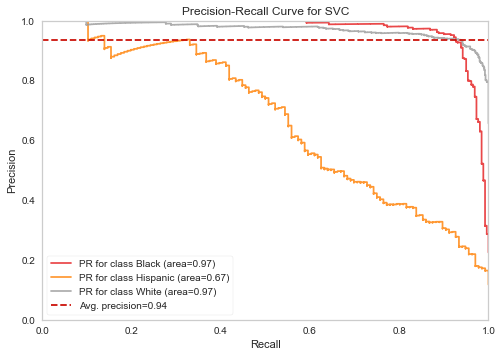

In [79]:
from yellowbrick.classifier import PrecisionRecallCurve

operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(class_weight="balanced",random_state=42))]

model = Pipeline(steps=operations_svc)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],   
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [80]:
viz.score_

{'Black': 0.9735503316813354,
 'Hispanic': 0.6707725115933684,
 'White': 0.9721159546655826,
 'micro': 0.9358722147398889}

In [81]:
y_pred = SVC_grid_model.predict(X_test)

svc_AP = viz.score_["Hispanic"]
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

### Vanilla RF Model

In [82]:
X = data.drop(columns =["DODRace"])
y = data["DODRace"]    

In [83]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5769 entries, 0 to 5768
Data columns (total 97 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   abdominalextensiondepthsitting  5769 non-null   int64 
 1   acromialheight                  5769 non-null   int64 
 2   acromionradialelength           5769 non-null   int64 
 3   anklecircumference              5769 non-null   int64 
 4   axillaheight                    5769 non-null   int64 
 5   balloffootcircumference         5769 non-null   int64 
 6   balloffootlength                5769 non-null   int64 
 7   biacromialbreadth               5769 non-null   int64 
 8   bicepscircumferenceflexed       5769 non-null   int64 
 9   bicristalbreadth                5769 non-null   int64 
 10  bideltoidbreadth                5769 non-null   int64 
 11  bimalleolarbreadth              5769 non-null   int64 
 12  bitragionchinarc                5769 non-null   

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [85]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 97)
Train target shape   :  (4615,)
Test features shape  :  (1154, 97)
Test target shape    :  (1154,)


In [86]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

In [87]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=42))]

pipe_model_rf = Pipeline(steps=operations_rf)

pipe_model_rf.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [88]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.pipeline import Pipeline

operations_rf = [("OneHotEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced",random_state=42))]

pipe_rf = Pipeline(steps=operations_rf)

In [89]:
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [90]:
eval_metric(pipe_rf, X_train, y_train, X_test, y_test, 
    'Random Forest', average=None, labels=["Hispanic"])

Test_Set
[[237  14   9]
 [  6 107  23]
 [ 12  93 653]]
              precision    recall  f1-score   support

       Black       0.93      0.91      0.92       260
    Hispanic       0.50      0.79      0.61       136
       White       0.95      0.86      0.91       758

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154

--------------------------------------------------------------------------------
Train_Set
[[ 973   34   31]
 [  21  454   68]
 [  64  357 2613]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.88      0.88      4615



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
Random Forest,0.864,0.611,0.787,0.500,0.875,0.654,0.836,0.537


In [91]:
from sklearn.model_selection import cross_validate, cross_val_score

operations_rf = [("OneHotEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced",random_state=42))]

pipe_dt = Pipeline(steps=operations_rf)
  
scoring = {
    "f1_Hispanic" : make_scorer(f1_score, average = None, labels=["Hispanic"]),
    "recall_Hispanic" : make_scorer(recall_score, average = None, labels=["Hispanic"]),
    "precision_Hispanic" : make_scorer(precision_score, average = None, labels=["Hispanic"])} 

scores = cross_validate(pipe_dt, X_train, y_train, scoring = scoring, n_jobs=-1, cv=5, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_Hispanic           0.070
train_f1_Hispanic          1.000
test_recall_Hispanic       0.037
train_recall_Hispanic      1.000
test_precision_Hispanic    0.690
train_precision_Hispanic   1.000
dtype: float64

### RF Model GridsearchCV

In [92]:
param_grid = {'RF_model__n_estimators':[400,500],
             'RF_model__max_depth':[1,2,3,4]}

In [93]:
from sklearn.model_selection import GridSearchCV

operations_rf = [("OneHotEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=42))]

model = Pipeline(steps=operations_rf)

rf_grid_model = GridSearchCV(model,
                             param_grid,
                             verbose=3,
                             scoring=recall_Hispanic,
                             n_jobs=-1, cv=10, return_train_score=True)

In [94]:
rf_grid_model.fit(X_train,y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV 7/10] END RF_model__max_depth=1, RF_model__n_estimators=400;, score=(train=0.706, test=0.704) total time=   0.7s
[CV 4/10] END RF_model__max_depth=1, RF_model__n_estimators=400;, score=(train=0.674, test=0.564) total time=   0.8s
[CV 1/10] END RF_model__max_depth=1, RF_model__n_estimators=400;, score=(train=0.687, test=0.648) total time=   0.8s
[CV 6/10] END RF_model__max_depth=1, RF_model__n_estimators=400;, score=(train=0.693, test=0.611) total time=   0.8s
[CV 9/10] END RF_model__max_depth=1, RF_model__n_estimators=400;, score=(train=0.652, test=0.685) total time=   0.8s
[CV 3/10] END RF_model__max_depth=1, RF_model__n_estimators=400;, score=(train=0.684, test=0.709) total time=   0.9s
[CV 10/10] END RF_model__max_depth=1, RF_model__n_estimators=400;, score=(train=0.703, test=0.648) total time=   0.9s
[CV 2/10] END RF_model__max_depth=1, RF_model__n_estimators=400;, score=(train=0.669, test=0.667) total time=   0.9s
[C

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [1, 2, 3, 4],
                         'RF_model__n_estimators': [400, 500]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [95]:
rf_grid_model.best_params_

{'RF_model__max_depth': 1, 'RF_model__n_estimators': 400}

In [96]:
rf_grid_model.best_score_

0.6703030303030302

In [97]:
rf_grid_model.best_index_

0

In [98]:
pd.DataFrame(rf_grid_model.cv_results_).loc[0, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.670
mean_train_score   0.680
Name: 0, dtype: object

In [99]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test, 'Random Forest', average=None, labels=["Hispanic"])


Test_Set
[[237  14   9]
 [  6 107  23]
 [ 12  93 653]]
              precision    recall  f1-score   support

       Black       0.93      0.91      0.92       260
    Hispanic       0.50      0.79      0.61       136
       White       0.95      0.86      0.91       758

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154

--------------------------------------------------------------------------------
Train_Set
[[ 973   34   31]
 [  21  454   68]
 [  64  357 2613]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.88      0.88      4615



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
Random Forest,0.864,0.611,0.787,0.500,0.875,0.654,0.836,0.537


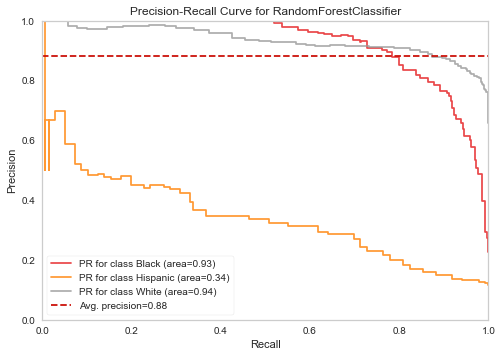

In [100]:
from yellowbrick.classifier import PrecisionRecallCurve

operations_rf = [("OneHotEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=42))]

model = Pipeline(steps=operations_rf)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],   
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [101]:
y_pred = rf_grid_model.predict(X_test)

rf_AP = viz.score_["Hispanic"]
rf_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])


## 4. XGBoost

### Vanilla XGBoost Model

In [102]:
%pip install xgboost==0.90

Note: you may need to restart the kernel to use updated packages.


In [103]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

operations_xgb = [("OneHotEncoder", column_trans), ("xgb", XGBClassifier(random_state=42))]

xgb_model = Pipeline(steps=operations_xgb)

In [104]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([0.50703142, 0.50703142, 0.50703142, ..., 0.50703142, 0.50703142,
       0.50703142])

In [105]:
comp = pd.DataFrame(classes_weights)

comp["label"] = pd.DataFrame(y_train).reset_index(drop=True)
comp.groupby("label")[0].value_counts()

label     0    
Black     1.482    1038
Hispanic  2.833     543
White     0.507    3034
Name: 0, dtype: int64

In [106]:
xgb_model.fit(X_train, y_train, xgb__eval_metric='logloss', xgb__sample_weight=classes_weights)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('xgb',
                 XGBClassifier(objective='multi:softprob', random_state=42))])

In [107]:
eval_metric(xgb_model, X_train, y_train, X_test, y_test,'XGBoost', average=None, labels=['Hispanic'])

Test_Set
[[237  14   9]
 [  6 107  23]
 [ 12  93 653]]
              precision    recall  f1-score   support

       Black       0.93      0.91      0.92       260
    Hispanic       0.50      0.79      0.61       136
       White       0.95      0.86      0.91       758

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154

--------------------------------------------------------------------------------
Train_Set
[[ 973   34   31]
 [  21  454   68]
 [  64  357 2613]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.88      0.88      4615



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
XGBoost,0.864,0.611,0.787,0.500,0.875,0.654,0.836,0.537


In [108]:
from sklearn.model_selection import cross_validate, cross_val_score

operations_xgb = [("OneHotEncoder", column_trans), ("xgb", XGBClassifier(random_state=42))]

xgb_model = Pipeline(steps=operations_xgb)
  
scoring = {
    "f1_Hispanic" : make_scorer(f1_score, average = None, labels=["Hispanic"]),
    "recall_Hispanic" : make_scorer(recall_score, average = None, labels=["Hispanic"]),
    "precision_Hispanic" : make_scorer(precision_score, average = None, labels=["Hispanic"])} 

scores = cross_validate(xgb_model, X_train, y_train, scoring = scoring, n_jobs=-1, cv=5, fit_params={"xgb__sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_Hispanic          0.491
test_recall_Hispanic      0.593
test_precision_Hispanic   0.419
dtype: float64

### XGBoost Model GridsearchCV

In [109]:
from sklearn.model_selection import GridSearchCV

operations_xgb = [("OneHotEncoder", column_trans), ("xgb", XGBClassifier(random_state=42))]

xgb_model = Pipeline(steps=operations_xgb)

param_grid = {"xgb__n_estimators":[20],
              'xgb__max_depth':[1,2],
              "xgb__learning_rate": [0.03, 0.05],
              "xgb__subsample":[0.8, 1],
              "xgb__colsample_bytree":[0.4, 0.7]}

xgb_grid_model = GridSearchCV(xgb_model, 
                              param_grid, 
                              scoring=recall_Hispanic, 
                              n_jobs = -1,
                              cv=5,
                              return_train_score=True
                             )

In [110]:
xgb_grid_model.fit(X_train, y_train, xgb__eval_metric='logloss', xgb__sample_weight=classes_weights)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('xgb',
                                        XGBClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'xgb__colsample_bytree': [0.4, 0.7],
                         'xgb__learning_rate': [0.03, 0.05],
                         'xgb__max_depth': [1, 2], 'xgb__n_estimators': [20],
                         'xgb__subsample': [0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [111]:
xgb_grid_model.best_params_

{'xgb__colsample_bytree': 0.4,
 'xgb__learning_rate': 0.05,
 'xgb__max_depth': 2,
 'xgb__n_estimators': 20,
 'xgb__subsample': 1}

In [112]:
xgb_grid_model.best_score_

0.5985219164118247

In [113]:
xgb_grid_model.best_index_

7

In [114]:
pd.DataFrame(xgb_grid_model.cv_results_).loc[7,['mean_test_score','mean_train_score']]

mean_test_score    0.599
mean_train_score   0.653
Name: 7, dtype: object

In [115]:
eval_metric(xgb_grid_model, X_train, y_train, X_test, y_test,'XGBoost', average=None, labels=['Hispanic'])

Test_Set
[[237  14   9]
 [  6 107  23]
 [ 12  93 653]]
              precision    recall  f1-score   support

       Black       0.93      0.91      0.92       260
    Hispanic       0.50      0.79      0.61       136
       White       0.95      0.86      0.91       758

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154

--------------------------------------------------------------------------------
Train_Set
[[ 973   34   31]
 [  21  454   68]
 [  64  357 2613]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.88      0.88      4615



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
XGBoost,0.864,0.611,0.787,0.500,0.875,0.654,0.836,0.537


In [116]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, auc
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve, average_precision_score

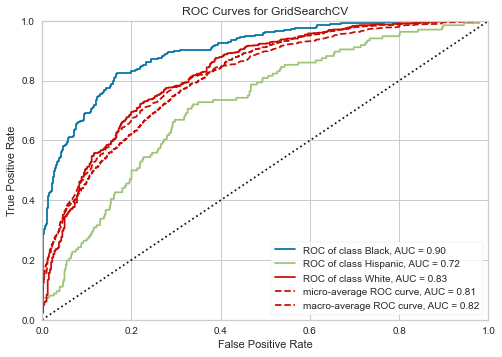

In [117]:
from yellowbrick.classifier import ROCAUC
model = xgb_grid_model

visualizer = ROCAUC(model)
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show(); 

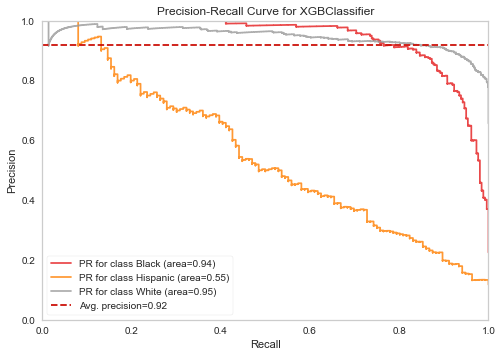

In [118]:
from yellowbrick.classifier import PrecisionRecallCurve

operations_xgb = [("OneHotEncoder", column_trans), ("xgb", XGBClassifier(random_state=42))]

xgb_model = Pipeline(steps=operations_xgb)

viz = PrecisionRecallCurve(
    xgb_model,
    per_class=True, classes= ["Black", "Hispanic", "White"],   
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [119]:
y_pred = xgb_grid_model.predict(X_test)

xgb_AP = viz.score_["Hispanic"]
xgb_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
xgb_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

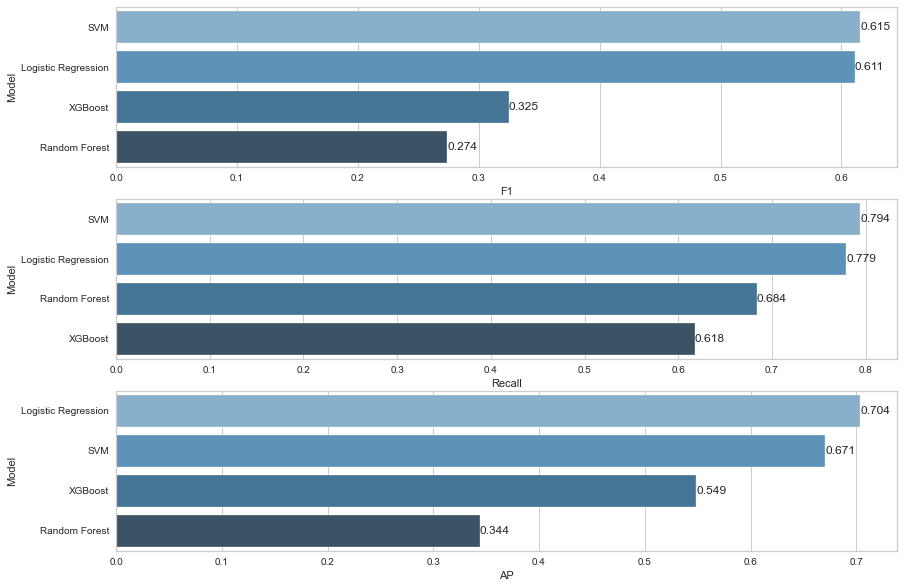

In [120]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
                        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                        "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})
    
plt.figure(figsize=(14,10))

plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.show()

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [121]:
column_trans_final = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())
operations = [("OneHotEncoder", column_trans), ("SVC", SVC(class_weight="balanced",random_state=42))]

final_model = Pipeline(steps=operations)

In [122]:
final_model.fit(X,y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('SVC', SVC(class_weight='balanced', random_state=42))])

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [123]:
!pip install imblearn

In [124]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline

In [125]:
X = data.drop(columns=['DODRace'])
y = data['DODRace']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [126]:
cat = X.select_dtypes("object").columns
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

In [127]:
X_train_ohe = column_trans.fit_transform(X_train)

In [128]:
over = SMOTE()
X_over, y_over = over.fit_resample(X_train_ohe, y_train)
y_over.value_counts()

White       3034
Black       3034
Hispanic    3034
Name: DODRace, dtype: int64

In [129]:
under = RandomUnderSampler()
X_under, y_under = under.fit_resample(X_train_ohe, y_train)
y_under.value_counts()

Black       543
Hispanic    543
White       543
Name: DODRace, dtype: int64

In [130]:
over = SMOTE(sampling_strategy={"Hispanic": 1000})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

In [131]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train_ohe, y_train)

In [132]:
y_train.value_counts()

White       3034
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

In [133]:
y_resampled_over.value_counts()

White       3034
Black       1038
Hispanic    1000
Name: DODRace, dtype: int64

In [134]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train_ohe, y_train)

In [135]:
y_resampled_under.value_counts()

White       2500
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

In [136]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline

smote = SMOTE(sampling_strategy={"Hispanic": 1000}, random_state=42) 
under = RandomUnderSampler(sampling_strategy={"White": 2500}, random_state=42) 
log_model = LogisticRegression(random_state=42)

pipe_log_smote = Pipeline([
    ("OneHotEncoder",column_trans),
    ("smote", smote),
    ("under", under),
    ("log", log_model),
])
pipe_log_smote.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('smote',
                 SMOTE(random_state=42, sampling_strategy={'Hispanic': 1000})),
                ('under',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy={'White': 2500})),
                ('log', LogisticRegression(random_state=42))])

In [137]:
eval_metric(
    pipe_log_smote, X_train, y_train, X_test, y_test, 
    'Smote Logistic', average=None, labels=["Hispanic"]
)

Test_Set
[[237  14   9]
 [  6 107  23]
 [ 12  93 653]]
              precision    recall  f1-score   support

       Black       0.93      0.91      0.92       260
    Hispanic       0.50      0.79      0.61       136
       White       0.95      0.86      0.91       758

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154

--------------------------------------------------------------------------------
Train_Set
[[ 973   34   31]
 [  21  454   68]
 [  64  357 2613]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.88      0.88      4615



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
Smote Logistic,0.864,0.611,0.787,0.500,0.875,0.654,0.836,0.537


In [152]:
from sklearn.model_selection import cross_validate, cross_val_score

smote = SMOTE(sampling_strategy={"Hispanic": 2400}, random_state=42) 
under = RandomUnderSampler(sampling_strategy={"White": 2400}, random_state=42) 
log_model = LogisticRegression(random_state=42)

# pipeline for Cross Validate
model = Pipeline([
    ("OneHotEncoder",column_trans),
    ("smote", smote),
    ("under", under),
    ("log", log_model),
])
scoring = {
    "f1_Hispanic" : make_scorer(f1_score, average = None, labels=["Hispanic"]),
    "recall_Hispanic" : make_scorer(recall_score, average = None, labels=["Hispanic"]),
    "precision_Hispanic" : make_scorer(precision_score, average = None, labels=["Hispanic"]),
}
scores = cross_validate(
    model, X_train, y_train, 
    scoring = scoring, 
    error_score="raise",
    n_jobs=-1,
    cv=5,
)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

/Users/lavondaharrison/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/lavondaharrison/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

test_f1_Hispanic          0.596
test_recall_Hispanic      0.760
test_precision_Hispanic   0.491
dtype: float64

## SVC Over/Under Sampling

## Xgboost Over/ Under Sampling

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [140]:
%pip install shap

Note: you may need to restart the kernel to use updated packages.


In [146]:
import shap

In [156]:
import shap
explainer = shap.Explainer(model,X_train)
start_index = 203
end_index = 204
shap_values = explainer.shap_values(X_test[start_index:end_index])

In [143]:
column_trans_shap = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

X_train_trans = column_trans_shap.fit_transform(X_train)
X_test_trans = column_trans_shap.transform(X_test)

In [145]:
shap_model = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=42, penalty="l1", solver='saga')
shap_model.fit(X_train_trans, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=42, solver='saga')

In [155]:
eval_metric(shap_model, X_train_trans, y_train, X_test_trans, y_test, 'Logistic Regression',average = None, labels=['Hispanic'] )

In [ ]:
scores = cross_validate(shap_model, X_train_trans, y_train, scoring = scoring, cv = 5, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

In [148]:
#shap_values

In [ ]:
print(shap_values[0].shape)

In [ ]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = log_model.predict(X_test[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index], # for values
                feature_names= X.columns,) 

In [ ]:
shap.summary_plot(shap_values, X_train,max_display=300,feature_names = X.columns)

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___